# Coveo Dataset Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Coveo dataset

In [2]:
browsing_train = pd.read_csv("../coveo_dataset/raw_data/browsing_train.csv")
search_train = pd.read_csv("../coveo_dataset/raw_data/search_train.csv")
sku_to_content = pd.read_csv("../coveo_dataset/raw_data/sku_to_content.csv")

#### **Be aware that a PDP may generate both a detail and a pageview event.**

In [3]:
browsing_train.head(10)

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
5,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885234192,45ee51e47bb1c2e5fe1c0563d1ead53b602a7d0c68e85f...
6,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885304014,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
7,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885304014,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
8,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885310275,298d7b7b37ed8a75c5717e63064489c7f3bf5e71cedf83...
9,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885320873,b7effb75760046b628876248d84d56586796d22c0d10a2...


In [4]:
search_train.head(10)

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms
0,48fade624d47870058ce07dd789ccc04e46c70c0fa2a1b...,"[-0.20255649089813232, -0.016908567398786545, ...",NaN,NaN,1548575194779
1,8731ca84ff7bb8cb647531d54e64feedb2519b4a7792a7...,"[-0.007610442116856575, -0.14909175038337708, ...",NaN,['9ee9ffd7e2529a65f9a0b0c9eaae6330df85cf2e3af3...,1548276763869
2,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.20023074746131897, -0.03151938319206238, 0...",NaN,['7cc72dbed53bab78ec6a62feaa5052a7a1db7d201664...,1548937997295
3,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548938038268
4,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.03269264101982117, -0.27234694361686707, 0...",NaN,['2a0ee2924feabeec35e21e8fcb4d5b0684d190e46cef...,1548938093827
5,57e1491447148ba86b0a14f1f12e9910ad97427ca5e2df...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548990350736
6,94d672f77ebca613f020d4d6aeb3706669647ceaa9a7fe...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548970203273
7,ebc25330712ab908d6044f8d9a7605b3e5f1a2d0f2772a...,"[-0.05228812247514725, -0.1633286029100418, 0....",NaN,['56e9531819044bb70b80b2e3f798dbd4f71b08cd7a1a...,1547741688511
8,49e0c1b5741a28a271b69067182ee1178b02e6b0341c44...,"[-0.06451448798179626, -0.24443978071212769, 0...",NaN,NaN,1547574659979
9,49e0c1b5741a28a271b69067182ee1178b02e6b0341c44...,"[-0.020983241498470306, -0.2368796169757843, 0...",NaN,NaN,1547574673838


In [5]:
sku_to_content.head(10)

,product_sku_hash,description_vector,category_hash,image_vector,price_bucket
0,26ce7b47f4c46e4087e83e54d2f7ddc7ea57862fed2e2a...,NaN,NaN,NaN,NaN
1,6383992be772b204a9ab75f86c86f5583d1bdd1222952d...,NaN,NaN,NaN,NaN
2,a2c3e2430c6ef9770b903ad08fa067a6b2b9db28f06e1b...,"[0.27629122138023376, -0.15763211250305176, 0....",06fa312761d4b39e2f649781514ac69a4c1505c221fc46...,"[340.3592564184389, -220.19025864725685, 154.0...",7.0
3,1028ef615e425c328e7b95010dfb1fb93cf63749a1bc80...,"[0.4058118760585785, -0.03595402091741562, 0.2...",115a6a7017ee55752b8487c77dfde92b0d501d10a2e69c...,"[180.3463662921092, 222.702322343354, -8.88703...",8.0
4,9870c682d0d52d635501249da0eeaa118fad430b695ea1...,"[-0.3206155300140381, 0.01991105079650879, 0.0...",0665a81d19c89281cc00e7f7d779ded2ed42c933838602...,"[-114.81079301576219, 84.55770104232334, 85.51...",2.0
5,dc1261876c9473cf4b87e6bfc7f1895b8a6241a53e82fc...,NaN,NaN,NaN,NaN
6,59ce06d83038128ed6eb997bfe477f677ea2f753413d40...,NaN,NaN,NaN,NaN
7,6d525bb527043f6a80a13e5581f31ad41dbfbcb7786f07...,"[-0.1854386031627655, 0.19424490630626678, -0....",0665a81d19c89281cc00e7f7d779ded2ed42c933838602...,"[-136.92241034233342, 38.10508984596936, 55.68...",6.0
8,4506042dfdaadb6b741ffdf38641fc2d75b5234047fde3...,NaN,NaN,NaN,NaN
9,b1d520b75f8c45a3e2b4c755b14fe5ce3378845fddba5e...,NaN,NaN,NaN,NaN


#### Columns

In [6]:
browsing_train.columns

Index(['session_id_hash', 'event_type', 'product_action', 'product_sku_hash',
       'server_timestamp_epoch_ms', 'hashed_url'],
      dtype='object')

In [7]:
search_train.columns

Index(['session_id_hash', 'query_vector', 'clicked_skus_hash',
       'product_skus_hash', 'server_timestamp_epoch_ms'],
      dtype='object')

In [8]:
sku_to_content.columns

Index(['product_sku_hash', 'description_vector', 'category_hash',
       'image_vector', 'price_bucket'],
      dtype='object')

---
#### Number of Sessions

In [9]:
browsing_train["session_id_hash"].nunique()

4934699

#### Number of Products

In [10]:
sku_to_content["product_sku_hash"].nunique()

66386

#### Number of unique products in interactions

In [11]:
browsing_train["product_sku_hash"].nunique()

57483

#### Number of Interactions

In [12]:
browsing_train.shape[0]

36079307

#### Number of Product Interactions

In [13]:
browsing_train["event_type"].value_counts()

pageview         25647696
event_product    10431611
Name: event_type, dtype: int64

#### Number of add-to-cart & Purchases

In [14]:
browsing_train["product_action"].value_counts()

detail      9707890
add          329557
remove       316316
purchase      77848
Name: product_action, dtype: int64

#### Number of Search Requests

In [15]:
search_train.shape[0]

819516

#### Number of Search Clicks

In [16]:
import ast
def convert_str_to_list(x):
    if pd.isnull(x):
        return x
    return ast.literal_eval(x)

search_train['clicked_skus_hash'] = search_train['clicked_skus_hash'].apply(convert_str_to_list)

In [17]:
search_train['clicked_skus_hash'].str.len().sum()

392187.0

---
### Price Bucket Plot over all products

price_bucket: The product price, provided as a 10-quantile integer.

In [18]:
sku_to_content['price_bucket'].describe()

count    32038.000000
mean         5.491822
std          2.873216
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: price_bucket, dtype: float64

In [19]:
price_bucket_frequency: pd.DataFrame = sku_to_content.groupby(['price_bucket']).size().reset_index()
price_bucket_frequency.columns = ["price_bucket", "frequency"]

price_bucket_frequency

,price_bucket,frequency
0,1.0,3198
1,2.0,3103
2,3.0,3350
3,4.0,3409
4,5.0,3086
5,6.0,3079
6,7.0,3191
7,8.0,3183
8,9.0,3238
9,10.0,3201


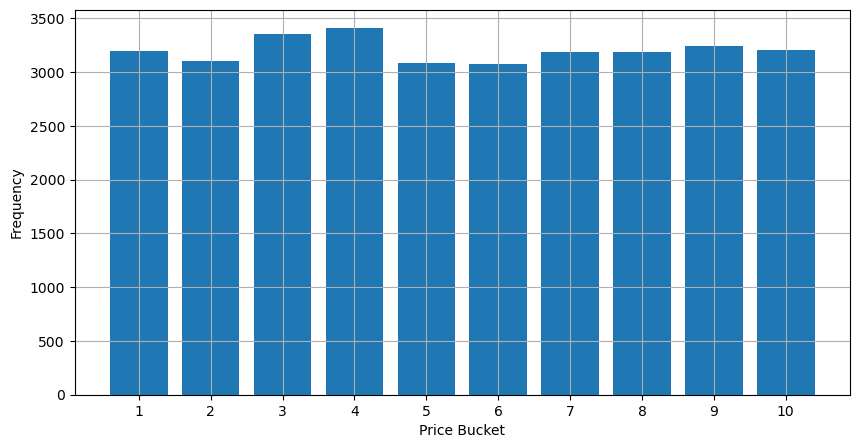

In [20]:
plt.figure(figsize=(10,5))
plt.bar(price_bucket_frequency['price_bucket'], price_bucket_frequency['frequency'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

### Price Bucket Plot over all products in interactions

In [21]:
product_interactions_with_prices = pd.merge(
    browsing_train[browsing_train['product_sku_hash'].notnull()]['product_sku_hash'],
    sku_to_content[['product_sku_hash', 'price_bucket']],
    on='product_sku_hash',
    how='left')
product_interactions_with_prices

,product_sku_hash,price_bucket
0,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,10.0
1,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,10.0
2,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,10.0
3,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,10.0
4,5fa44b39fe0ecc17d713a020ebb802bbe685c6f70d059c...,10.0
...,...,...
10431606,fbdfbd3ead2eea0b54bba77e87f920c7ffd071dd13b9ce...,7.0
10431607,c0dc796d30424b4434a0922bd7c7675c955e9821c059d1...,6.0
10431608,c0dc796d30424b4434a0922bd7c7675c955e9821c059d1...,6.0
10431609,c0dc796d30424b4434a0922bd7c7675c955e9821c059d1...,6.0


In [22]:
product_prices: pd.DataFrame = product_interactions_with_prices.groupby('product_sku_hash').agg({'price_bucket': 'first'}).reset_index()
product_prices

,product_sku_hash,price_bucket
0,000082c13a39a85caafc0b435f37b8cccb3aa3b0c63d56...,6.0
1,00021c22af5a39b6297fa304566f9cfcf7982689904a0b...,NaN
2,000287bdd487f7ca56435b6af745222a3e2c3452ca9d53...,NaN
3,00056f966469cf20e4d2c8ecd863e54c613161e57960d7...,3.0
4,0005c742138a6bf913d314c829f41ff2d8e665e9b3670b...,8.0
...,...,...
57478,fffa5efb4a8a42d90355936e10a701c280bdb63cb14ee6...,7.0
57479,fffae538a90ec5feec1d7a755a001470dd6475ec0ea047...,NaN
57480,fffe1e58693b42d75c011ab55645f1e0af9c877c4ba1c5...,NaN
57481,fffeb1ef42be9ca4c16137a3e0f235134cca7b7aedbed1...,5.0


In [23]:
product_interactions_with_prices.groupby('product_sku_hash').agg({'price_bucket': 'first'}).describe()

,price_bucket
count,29559.000000
mean,5.505599
std,2.892068
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [24]:
price_count: pd.DataFrame = product_prices.groupby('price_bucket').size().reset_index()
price_count.columns = ['price_bucket', 'count']
price_count

,price_bucket,count
0,1.0,2974
1,2.0,2925
2,3.0,3042
3,4.0,3058
4,5.0,2881
5,6.0,2764
6,7.0,2888
7,8.0,2954
8,9.0,3009
9,10.0,3064


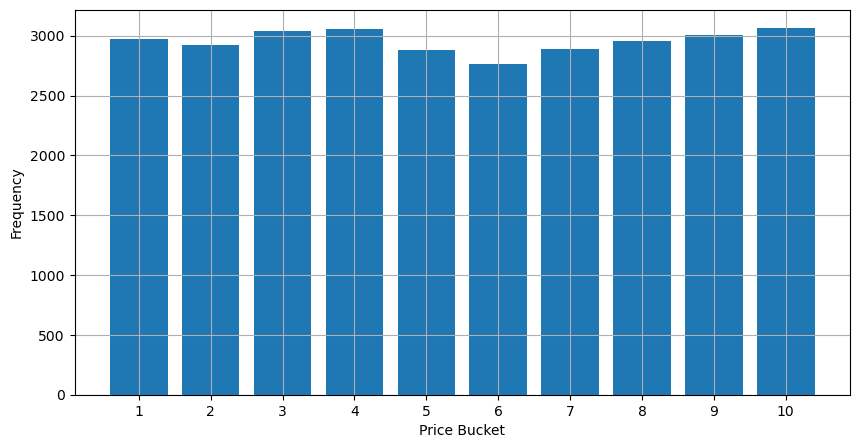

In [25]:
plt.figure(figsize=(10,5))
plt.bar(price_count['price_bucket'], price_count['count'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

### Price Bucket Plot over all interactions

In [26]:
price_count: pd.DataFrame = product_interactions_with_prices.groupby('price_bucket').size().reset_index()
price_count.columns = ['price_bucket', 'count']
price_count

,price_bucket,count
0,1.0,166527
1,2.0,196796
2,3.0,275440
3,4.0,429975
4,5.0,619693
5,6.0,899413
6,7.0,1197999
7,8.0,2012588
8,9.0,1866667
9,10.0,2440991


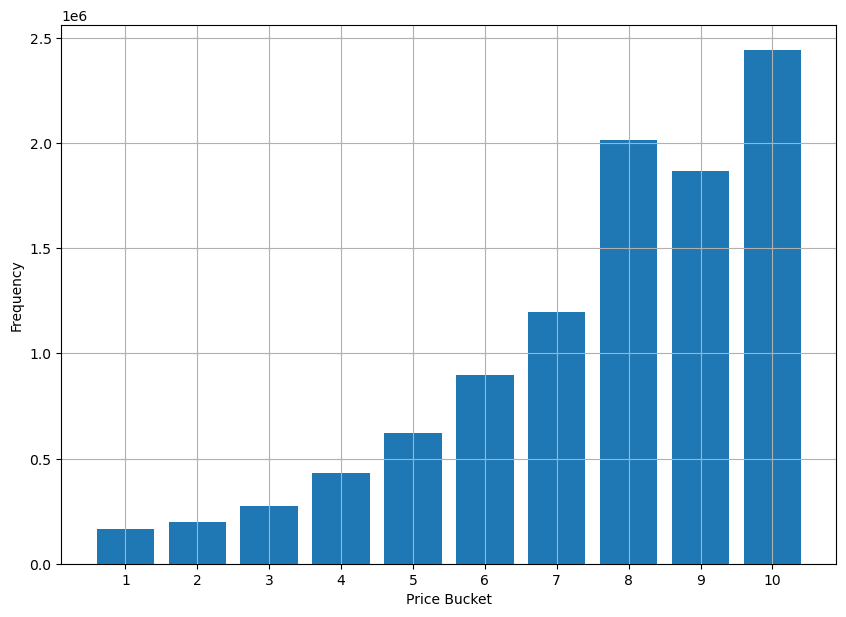

In [27]:
plt.figure(figsize=(10,7))
plt.bar(price_count['price_bucket'], price_count['count'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

---
### Session length stats (with percentiles)

In [28]:
browsing_train.groupby(["session_id_hash"]).size().describe()

count    4.934699e+06
mean     7.311349e+00
std      1.229168e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      2.060000e+02
dtype: float64

In [29]:
session_lengths: pd.DataFrame = browsing_train.groupby(["session_id_hash"]).size().reset_index()
session_lengths.columns = ['session_id', 'session_length']

session_lengths

,session_id,session_length
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,18
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,6
2,000009f36a40de1d557afc083dbb3fc03eef2473337bad...,2
3,00000e812c3076d18245710a31b348d3f23314b7d0dc90...,1
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,81
...,...,...
4934694,ffffed918e1086333206d96f1fae684de5774866848bb3...,1
4934695,fffff2183ad2daa1db3bc4cd320e7248b2f5a6ef9709c4...,7
4934696,fffff429d16c1f43796e2c7ccad8a34f8a37b59927b5b4...,4
4934697,fffff68e9f346ad171103ae6125899a72c0d77d2d0637c...,2


In [30]:
session_length_count: pd.DataFrame = session_lengths.groupby(["session_length"]).size().reset_index()
session_length_count.columns = ['session_length', 'count']

session_length_count

,session_length,count
0,1,927685
1,2,1418333
2,3,276347
3,4,428456
4,5,189987
...,...,...
199,200,275
200,201,4
201,202,3
202,203,1


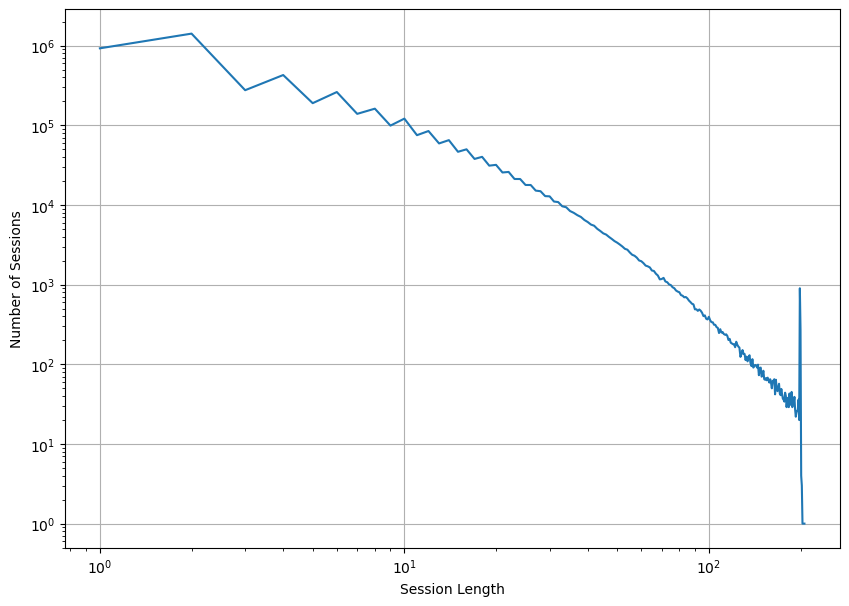

In [31]:
plt.figure(figsize=(10,7))
plt.plot(session_length_count['session_length'], session_length_count['count'])
plt.xlabel("Session Length")
plt.ylabel("Number of Sessions")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

---
### Number of interactions per item (with percentile)

In [32]:
browsing_train.groupby(["product_sku_hash"]).size().describe()

count     57483.000000
mean        181.472975
std        1094.340898
min           1.000000
25%           1.000000
50%           5.000000
75%          74.000000
max      180031.000000
dtype: float64

In [33]:
products_frequency: pd.DataFrame = browsing_train.groupby(["product_sku_hash"]).size().reset_index()
products_frequency.columns = ['product_sku', 'frequency']

products_frequency

,product_sku,frequency
0,000082c13a39a85caafc0b435f37b8cccb3aa3b0c63d56...,4
1,00021c22af5a39b6297fa304566f9cfcf7982689904a0b...,1
2,000287bdd487f7ca56435b6af745222a3e2c3452ca9d53...,1
3,00056f966469cf20e4d2c8ecd863e54c613161e57960d7...,90
4,0005c742138a6bf913d314c829f41ff2d8e665e9b3670b...,79
...,...,...
57478,fffa5efb4a8a42d90355936e10a701c280bdb63cb14ee6...,333
57479,fffae538a90ec5feec1d7a755a001470dd6475ec0ea047...,13
57480,fffe1e58693b42d75c011ab55645f1e0af9c877c4ba1c5...,1
57481,fffeb1ef42be9ca4c16137a3e0f235134cca7b7aedbed1...,85


In [34]:
products_frequency_count: pd.DataFrame = products_frequency.groupby(["frequency"]).size().reset_index()
products_frequency_count.columns = ['product_frequency', 'count']

products_frequency_count

,product_frequency,count
0,1,17414
1,2,5977
2,3,2914
3,4,1666
4,5,1207
...,...,...
2569,34209,1
2570,36256,1
2571,38264,1
2572,44318,1


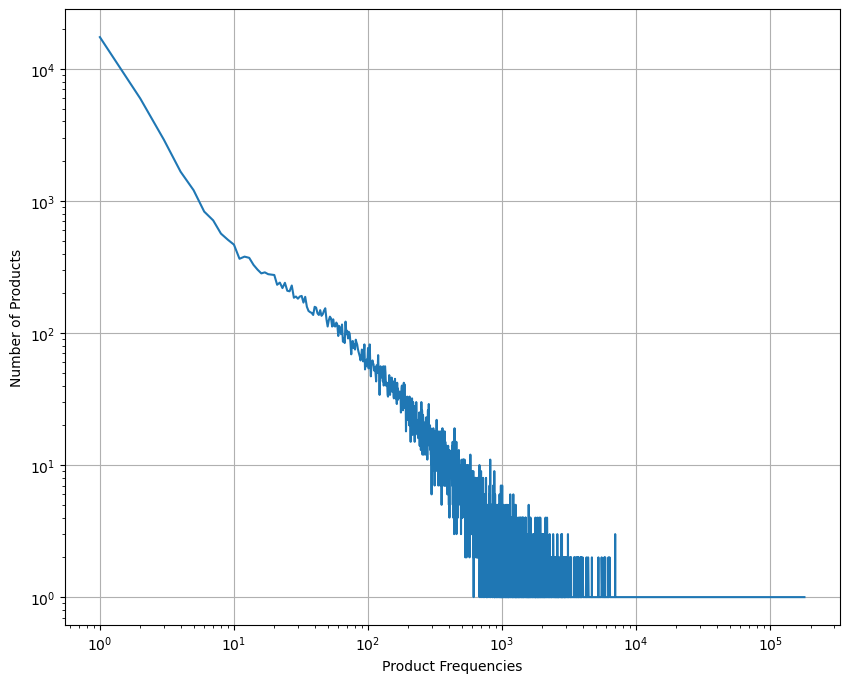

In [35]:
plt.figure(figsize=(10,8))
plt.plot(products_frequency_count['product_frequency'], products_frequency_count['count'])
plt.xlabel("Product Frequencies")
plt.ylabel("Number of Products")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()